# 01 Naive Bayes
- From Udacity's Intro To Machine Learning class
- Naive Bayes algorithm used to probabilistically classify
- Prior probability + test_evidence => Posterier probability

## 1. Simple Naive Bayes Classification Example

### Create a simple test dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn.naive_bayes import GaussianNB
%matplotlib inline

# assign some points and labels
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]]) ## features
Y = np.array([1, 1, 1, 2, 2, 2])  ## labels

clf = GaussianNB()

clf.fit(X,Y) ## fit function takes features as X and labels as Y

dictionary = {"1":[[-1,1], [-2, -1], [-3, -2]], "2":[[1, 1], [2, 1], [3, 2]]}

print "Point (-2,5) is predicted as class %d" %(clf.predict([[-2,5]]))

print "Point (-3,-1) is predicted as class %d" %clf.predict([[-3,-1]])

Point (-2,5) is predicted as class 2
Point (-3,-1) is predicted as class 1


In [2]:
def coord_grab(X):
    ## function to grab the coordinates from our array
    x=[]
    y=[]
    for coord in X:
        x.append(X[0])
        y.append(X[1])
    return x, y 

coord_grab(X)

([array([-1, -1]),
  array([-1, -1]),
  array([-1, -1]),
  array([-1, -1]),
  array([-1, -1]),
  array([-1, -1])],
 [array([-2, -1]),
  array([-2, -1]),
  array([-2, -1]),
  array([-2, -1]),
  array([-2, -1]),
  array([-2, -1])])

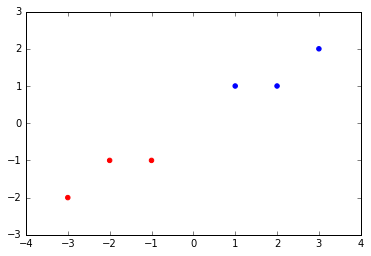

[-1, -2, -3, 1, 2, 3]
[-1, -1, -2, 1, 1, 2]


In [3]:
## Very handy list generation - including for loop in list

x_val = [x[0] for x in X]
y_val = [x[1] for x in X]

color=['r','r','r','b','b','b']
    
plt.scatter(x_val,y_val, color=color)

plt.show()

print x_val

print y_val

###  Now create the above graph using data frames

In [4]:
## Create the initial DataFrame

df = pd.DataFrame({
        'x_val': x_val,
        'y_val': y_val,
        'label': Y
    })

df

,label,x_val,y_val
0,1,-1,-1
1,1,-2,-1
2,1,-3,-2
3,2,1,1
4,2,2,1
5,2,3,2


In [5]:
# Now group this dataframe into the different classes and look at some stats
groups = df.groupby('label')
groups.describe()

x_val     y_val
label                       
1     count    3.0  3.000000
      mean    -2.0 -1.333333
      std      1.0  0.577350
      min     -3.0 -2.000000
      25%     -2.5 -1.500000
      50%     -2.0 -1.000000
      75%     -1.5 -1.000000
      max     -1.0 -1.000000
2     count    3.0  3.000000
      mean     2.0  1.333333
      std      1.0  0.577350
      min      1.0  1.000000
      25%      1.5  1.000000
      50%      2.0  1.000000
      75%      2.5  1.500000
      max      3.0  2.000000

### Let's plot our data points and use NB to make a prediction for new points

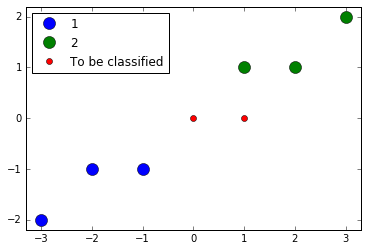

In [6]:
# Plot
ax = plt.subplot()
#fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x_val, group.y_val, marker='o', linestyle='', ms=12, label=name)


unknown_x=[0,1]  
unknown_y=[0,0]
ax.plot(unknown_x, unknown_y, 'or', label="To be classified")

ax.legend(loc="upper left", numpoints=1)    

plt.show()

In [7]:
print "Using NB classification, point (0,0) is expected to be class %d" %(clf.predict([[0,0]]))
print "Using NB classification, point (1,0) is expected to be class %d" %(clf.predict([[1,0]]))

Using NB classification, point (0,0) is expected to be class 1
Using NB classification, point (1,0) is expected to be class 2


## 2. GaussianNB deployment on self-driving car data
- Quiz 19 
- Try to determine what driving speed is appropriate for what terrain

###  Define the classifier funciton

In [8]:
## Define the classifier funciton

def classify(features_train, labels_train):   
    from sklearn.naive_bayes import GaussianNB
    clf = GaussianNB()
    fit = clf.fit(features_train, labels_train) 
    return fit


###  Prepare the training data
- We will look at how grade and bumpiness of driving terrain will affect speed.

In [9]:
## Prep Terrain Data

import random


def makeTerrainData(n_points=1000):
###############################################################################
### make the toy dataset
    random.seed(42)
    grade = [random.random() for ii in range(0,n_points)]
    bumpy = [random.random() for ii in range(0,n_points)]
    error = [random.random() for ii in range(0,n_points)]
    y = [round(grade[ii]*bumpy[ii]+0.3+0.1*error[ii]) for ii in range(0,n_points)]
    for ii in range(0, len(y)):
        if grade[ii]>0.8 or bumpy[ii]>0.8:
            y[ii] = 1.0

### split into train/test sets
    X = [[gg, ss] for gg, ss in zip(grade, bumpy)]
    split = int(0.75*n_points)
    X_train = X[0:split]
    X_test  = X[split:]
    y_train = y[0:split]
    y_test  = y[split:]

    grade_sig = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==0]
    bumpy_sig = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==0]
    grade_bkg = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==1]
    bumpy_bkg = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==1]

#    training_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
#            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}


    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    test_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}

    return X_train, y_train, X_test, y_test
#    return training_data, test_data

###  Create a prettyPicture function
- Create a nice plot

In [10]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib 
matplotlib.use('agg')

import matplotlib.pyplot as plt
import pylab as pl
import numpy as np

#import numpy as np
#import matplotlib.pyplot as plt
#plt.ioff()

def prettyPicture(clf, X_test, y_test):
    x_min = 0.0; x_max = 1.0
    y_min = 0.0; y_max = 1.0

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)

    # Plot also the test points
    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    plt.scatter(grade_sig, bumpy_sig, color = "b", label="fast")
    plt.scatter(grade_bkg, bumpy_bkg, color = "r", label="slow")
    plt.legend()
    plt.xlabel("bumpiness")
    plt.ylabel("grade")
    plt.show()
    #plt.savefig("test.png")
    
import base64
import json
import subprocess

def output_image(name, format, bytes):
    image_start = "BEGIN_IMAGE_f9825uweof8jw9fj4r8"
    image_end = "END_IMAGE_0238jfw08fjsiufhw8frs"
    data = {}
    data['name'] = name
    data['format'] = format
    data['bytes'] = base64.encodestring(bytes)
    print image_start+json.dumps(data)+image_end

###  Now use the above to plot some points and the decision boundary
- Goal is to draw a decison boundary that will enable us to decide which terrain to go slow and which terrain to go fast on

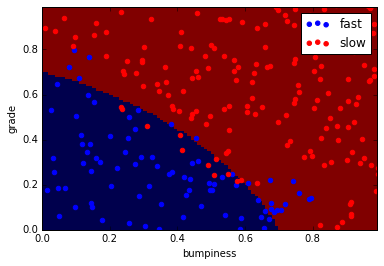

In [11]:
#!/usr/bin/python

""" Complete the code in ClassifyNB.py with the sklearn
    Naive Bayes classifier to classify the terrain data.
    
    The objective of this exercise is to recreate the decision 
    boundary found in the lesson video, and make a plot that
    visually shows the decision boundary """

features_train, labels_train, features_test, labels_test = makeTerrainData()

### the training data (features_train, labels_train) have both "fast" and "slow" points mixed
### in together--separate them so we can give them different colors in the scatterplot,
### and visually identify them
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]


# You will need to complete this function imported from the ClassifyNB script.
# Be sure to change to that code tab to complete this quiz.
clf = classify(features_train, labels_train)



### draw the decision boundary with the text points overlaid
prettyPicture(clf, features_test, labels_test)
#output_image("test.png", "png", open("test.png", "rb").read())






## 3. Determine the accuracy of our classifier
- accuracy = no. of points classified correctly / all_points (in test set)
- Method1 - write code that compares the predicitons to y_test, element-by-element
- Method2 - use sklearn's "accuracy_score"  

In [12]:
# fit our model with the training data
clf.fit(features_train, labels_train)

# create a prediction vector
pred = clf.predict(features_test)

### Method 1 - For loop iterates throught 2 tables, checking entries

In [13]:
## Method 1a
count = 0

for i in range(len(labels_test)):
    if labels_test[i] == pred[i]:
        count += 1
        
accuracy = float(count) / len(labels_test)                

print "Method 1a accuracy:", accuracy

Method 1a accuracy: 0.884


In [14]:
## Method 1b - iterate using zip.
count2 = 0

for (acutal, prediction) in zip(labels_test, pred):
    if acutal == prediction:
        count2 += 1
    
accuracy = float(count2) / len(labels_test)    

print "Method 1b accuracy:", accuracy

Method 1b accuracy: 0.884


### Method 2 - Use sklearn function

In [15]:
## Method 2

from sklearn.metrics import accuracy_score

print "Method 2 accuracy:", accuracy_score(pred, labels_test)

Method 2 accuracy: 0.884


####  If we're dealin with big lists then we need to alter the zip code as follows:

In [16]:
## In Python 2, zip returns a list of tuples. 
## This is fine when foo and bar are not massive. 
## If they are both massive then forming zip(foo,bar) is 
## an unnecessarily massive temporary variable, 
## and should be replaced by itertools.izip or itertools.izip_longest,
## which returns an iterator instead of a list.

'''
import itertools
for f,b in itertools.izip(labels_test, pred):
    print type((f,b))

print "\n\nPART 2"
    
for f,b in itertools.izip_longest(labels_test, pred):
    print type((f,b))
'''

'\nimport itertools\nfor f,b in itertools.izip(labels_test, pred):\n    print type((f,b))\n\nprint "\n\nPART 2"\n    \nfor f,b in itertools.izip_longest(labels_test, pred):\n    print type((f,b))\n'

### Naive Bayes Notes
- NB often used for text learning (predict who sent an email depending on contained text)
- Called 'Naive' as we don't include the order of events
- NB Pros - Easy to implement and run, deals well with large feature sets
- NB Cons - Can break (e.g. Early Google searches of 'Chicago Bulls' returning irrelevant results)